# **Course One | Supervised Machine Learning**
This is couse one of three in this specialization. This course covers supervised learning (regression, and classification).

## **Week One | Introduction To Machine Learning**
Welcome to the Machine Learning Specialization! You're joining millions of others who have taken either this or the original course, which led to the founding of Coursera, and has helped millions of other learners, like you, take a look at the exciting world of machine learning!

**Learning Objectives:**
* Define machine learning
* Define supervised learning
* Define unsupervised learning
* Write and run Python code in Jupyter Notebooks
* Define a regression model
* Implement and visualize a cost function
* Implement gradient descent
* Optimize a regression model using gradient descent

## **Overview of Machine Learning**
**Videos:**
The videos were straight forward welcome to the course, and also showed some real life applications of the subject.

## **Supervised vs. Unsupervised Machine Learning**
**Videos:**
The videos first defined **_machine learning_** as the act of making the computer do something without it being explicitly programmed to do it, i.e the machine learnes by itself, hence the name. The videos also defined the two main branches of machine learning: supervised learning and unsuprvised learning, and defined each one and gave example application of each one. **_supervised learning_** is the type of machine learning in which the imput would be labelled data, unlike the unsupervised one, were the input is unlabelled data, and the algorithm needs to find patterns in the data(cluster them, or detect the anamoly). PCA is another example of unsupervised learning, which I do not know what it is yet, but I thought mentioning it would be good here. For the **_supervised learning_** part, there is two main branches of it: Regression, where the output is continious(predict income for example), and classification, where the output is discrete(cancer type detection for example). This section introduced Jupyter notebooks as well, but I won't talk about it since I have been using it for a while now.

**Quizes:**
Very straight forward two conceptual questions quiz.

## **Regression Model**
**Videos:**
The videos covered what linear regression is, and went into great details at that. The opyinal labs were great as well. Nothing to note here as I will go through the topic from scratch in code later.

**Quizes:**
Very straight forward two conceptual questions quiz.

## **Train The Model With Gradient Descent**
**Videos:**
The videos covered what grasient descent is, and went into great details at that, and gave great intuition to understand it, and then covered how the gradient descent solves the cost function minimzation problem from the linear regression section before it. The optinal labs were great as well. Nothing to note here as I will go through the topic from scratch in code later.

**Quizes:**
Very straight forward two conceptual questions quiz.

## **implementing A linear Regression Model From Scratch | A Side Quest:**

### Problem Statement:
Here we have a dataset of the population of a ctiy vs the net profit, and we are trying to predict the profit for any population:

In [1]:
# Importing the relevant modules:

from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Loading the dataset:
df = pd.read_csv('bike_sharing_data.txt')

In [3]:
# Examining the dataset:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# df.describe() # Uncomment to examine the data more
# df.info()

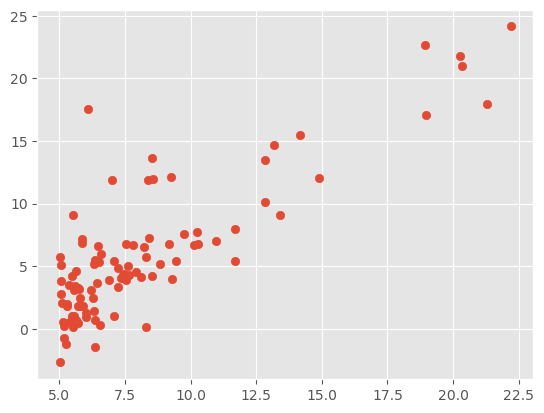

In [5]:
# Visualizing the data:
plt.scatter(df.Population, df.Profit)

* The data looks suitable for linear regression, so here I start with it:
* The optimum line will take the form  of w*x+b, where I need to optimize the w, and b values to give the best fit(minimze the error).

In [6]:
x_train = df.Population # The Feature
y_train = df.Profit     # The Target

### Computing The Cost:

In [7]:
# computing the cost function:
def cost(x,y,w,b):
    ''' This function computes the cost function ,
    Args:
    x: Feature data
    y: Target Data
    w: Parameter
    b: Parameter
    '''
    cost = 0
    m = len(x_train)
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    
    total_cost = cost / (2*m)
    
    return total_cost

### Computing The Derivitives:

In [8]:
# Computing the derivitives:
def gradients(x,y,w,b):
    ''' This function computes the cost function ,
    Args:
    x: Feature data
    y: Target Data
    w: Parameter
    b: Parameter
    '''
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    
    return dj_dw, dj_db

### Implementing The Gradient Descent Algorithm:

In [9]:
# Implementing the gradient descent alforithm:
def gradient_descent(w,b,alpha,itr):
    ''' This function employs the gradient descent algorithm
    Args:
    w, b: parameters
    alpha: learning rate
    gradients: the derivitive of the cost w.r.t w and b, respectively
    itr: The number of iterations
    '''
    j_history = [] # Saving the cost function values history for plotting later on
    for i in range(itr):
        djdw, djdb = gradients(x_train,y_train,w,b)
        w = w - alpha * djdw
        b = b - alpha * djdb
        
        if i<100000:      # prevent resource exhaustion 
            j_history.append( cost(x_train, y_train, w , b))
            
        if i% ceil(itr/10) == 0:   # prints 10 iterations or all of them if they're < 10
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {djdw: 0.3e}, dj_db: {djdb: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b , j_history

### Putting It All Together:

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.01
# run gradient descent
w_final, b_final, j_hist = gradient_descent(w_init, b_init, tmp_alpha, 
                                                    iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 6.74e+00  dj_dw: -6.533e+01, dj_db: -5.839e+00   w:  6.533e-01, b: 5.83914e-02
Iteration 1000: Cost 4.52e+00  dj_dw: -1.185e-02, dj_db:  1.180e-01   w:  1.127e+00, b:-3.24258e+00
Iteration 2000: Cost 4.48e+00  dj_dw: -1.951e-03, dj_db:  1.942e-02   w:  1.182e+00, b:-3.78826e+00
Iteration 3000: Cost 4.48e+00  dj_dw: -3.211e-04, dj_db:  3.196e-03   w:  1.191e+00, b:-3.87808e+00
Iteration 4000: Cost 4.48e+00  dj_dw: -5.285e-05, dj_db:  5.261e-04   w:  1.193e+00, b:-3.89287e+00
Iteration 5000: Cost 4.48e+00  dj_dw: -8.699e-06, dj_db:  8.659e-05   w:  1.193e+00, b:-3.89530e+00
Iteration 6000: Cost 4.48e+00  dj_dw: -1.432e-06, dj_db:  1.425e-05   w:  1.193e+00, b:-3.89570e+00
Iteration 7000: Cost 4.48e+00  dj_dw: -2.357e-07, dj_db:  2.346e-06   w:  1.193e+00, b:-3.89577e+00
Iteration 8000: Cost 4.48e+00  dj_dw: -3.880e-08, dj_db:  3.862e-07   w:  1.193e+00, b:-3.89578e+00
Iteration 9000: Cost 4.48e+00  dj_dw: -6.386e-09, dj_db:  6.356e-08   w:  1.193e+00, b:-3.89578e+00


### Plotting The Results:

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train, w_final*x_train + b_final)

### PLotting the convergence:

In [ ]:
plt.plot(range(iterations), j_hist)

### Inference Using Our Optimized Model:

In [ ]:
# Creating a basic prediction function:
profit_func = lambda population: w_final * population + b_final 

In [ ]:
population = 13.21
profit = profit_func(population)

print(f'Given a population of {population} million people, the model predicts a profit of {profit:.2f} million dollars')

### Notes & Tips:

* You can play around with the learning rate to see what happens when it is too high or too low. Examine the output of the gradient descent algorithm and see the convergence curve.

* The optional labs in the course have many great visualizations and interactive plots, so go there to see more, for I didn't do everything in between as I am not teaching, just implementing.

* I didn't prettify the plots since this is just for me, but I can always put the titles and the labels later.

* All of this can be done with three lines of code using machine learning libraries, but I am implementing it from the ground up for learning purpuses, so none of this is ever used in practice, and that's another reason why I didn't focus on producing great graphs and so on.